In [1]:
#Importamos las libreias pandas, numpy y matplolib respectivamente 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [23]:
#Carga desde un archivo .xlsx sin indice 
df= pd.read_csv('pais Hotel room_mex.csv')
df

listing_url  host_since  \
0                 https://www.airbnb.com/rooms/281134  2010-08-09   
1                https://www.airbnb.com/rooms/1565220  2012-06-01   
2                https://www.airbnb.com/rooms/1736063  2012-06-01   
3                 https://www.airbnb.com/rooms/571166  2010-08-09   
4                 https://www.airbnb.com/rooms/737328  2012-10-12   
..                                                ...         ...   
120  https://www.airbnb.com/rooms/1191430079828817253  2023-11-20   
121  https://www.airbnb.com/rooms/1191430130484570539  2023-11-20   
122  https://www.airbnb.com/rooms/1191430238014754309  2023-11-20   
123  https://www.airbnb.com/rooms/1191430521084135024  2023-11-20   
124  https://www.airbnb.com/rooms/1191431981766770022  2023-11-20   

    host_response_time host_response_rate host_acceptance_rate  \
0       within an hour               100%                  93%   
1       within an hour               100%                  92%   
2       within an hour               100%                  92%   
3       within an hour               100%                  93%   
4       within an hour               100%                  89%   
..                 ...                ...                  ...   
120     within an hour               100%                  92%   
121     within an hour               100%                  92%   
122     within an hour               100%                  92%   
123     within an hour               100%                  92%   
124     within an hour               100%                  92%   

    host_is_superhost                host_verifications  \
0                   t  ['email', 'phone', 'work_email']   
1                   t  ['email', 'phone', 'work_email']   
2                   t  ['email', 'phone', 'work_email']   
3                   t  ['email', 'phone', 'work_email']   
4                   t                ['email', 'phone']   
..                ...                               ...   
120                 f                         ['phone']   
121                 f                         ['phone']   
122                 f                         ['phone']   
123                 f                         ['phone']   
124                 f                         ['phone']   

    neighbourhood_cleansed               property_type   room_type  ...  \
0               Cuauhtémoc  Room in serviced apartment  Hotel room  ...   
1           Álvaro Obregón      Room in boutique hotel  Hotel room  ...   
2           Álvaro Obregón      Room in boutique hotel  Hotel room  ...   
3               Cuauhtémoc  Room in serviced apartment  Hotel room  ...   
4               Cuauhtémoc  Room in serviced apartment  Hotel room  ...   
..                     ...                         ...         ...  ...   
120             Cuauhtémoc               Room in hotel  Hotel room  ...   
121             Cuauhtémoc               Room in hotel  Hotel room  ...   
122             Cuauhtémoc               Room in hotel  Hotel room  ...   
123             Cuauhtémoc               Room in hotel  Hotel room  ...   
124             Cuauhtémoc               Room in hotel  Hotel room  ...   

    review_scores_cleanliness review_scores_checkin  \
0                        5.00                  5.00   
1                        5.00                  5.00   
2                        4.97                  4.89   
3                        5.00                  5.00   
4                        4.84                  5.00   
..                        ...                   ...   
120                      4.84                  4.80   
121                      4.84                  4.80   
122                      4.84                  4.80   
123                      4.84                  4.80   
124                      4.84                  4.80   

    review_scores_communication review_scores_location review_scores_value  \
0                          5.00                   5.00                4

In [24]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)

In [25]:
# Eliminar los signos de dólar y las comas, luego convertir a float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ramos\AppData\Local\Temp\ipykernel_4116\2661366386.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

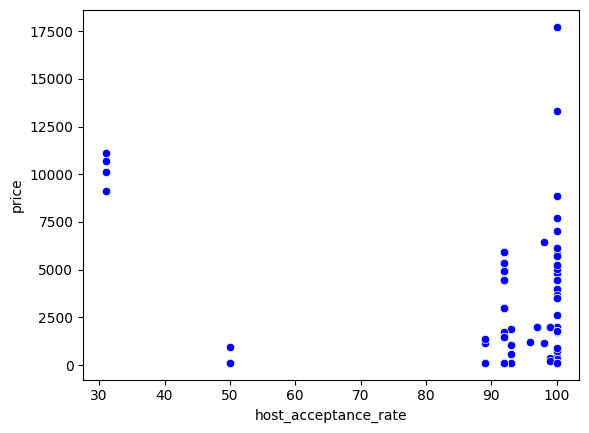

In [26]:
#Inprimimos el scatter plot entre la variable dependiente (total) e independiente (alcohol)
#para observar el comportamiento de su dispeción
from turtle import color 
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)

In [27]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['host_acceptance_rate']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']

In [28]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [29]:
#Veerficamos la finción relacionada al modelo
type (model)

sklearn.linear_model._base.LinearRegression

In [30]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Vars_Dep)

LinearRegression()

In [31]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-54.7541606]),
 'rank_': 1,
 'singular_': array([160.72585355]),
 'intercept_': 7950.54910532347}

In [32]:
model.score(Vars_Indep,Vars_Dep)

0.06356033922932791

In [33]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model.predict(X=df[['host_acceptance_rate']])
y_pred

array([2858.41216934, 2913.16632994, 2913.16632994, 2858.41216934,
       3077.42881174, 3077.42881174, 3077.42881174, 3077.42881174,
       2584.64136632, 6253.17012666, 2694.14968753, 2584.64136632,
       6253.17012666, 6253.17012666, 2475.13304512, 2475.13304512,
       3077.42881174, 6253.17012666, 2475.13304512, 2913.16632994,
       2529.88720572, 2639.39552693, 2475.13304512, 2529.88720572,
       2639.39552693, 2475.13304512, 3077.42881174, 2475.13304512,
       2475.13304512, 2475.13304512, 2475.13304512, 2475.13304512,
       2475.13304512, 2475.13304512, 2475.13304512, 2475.13304512,
       2475.13304512, 2475.13304512, 2475.13304512, 2475.13304512,
       2475.13304512, 2858.41216934, 2475.13304512, 2639.39552693,
       2475.13304512, 2475.13304512, 2475.13304512, 2475.13304512,
       2475.13304512, 2475.13304512, 2858.41216934, 3077.42881174,
       2913.16632994, 2475.13304512, 2858.41216934, 2475.13304512,
       2475.13304512, 2475.13304512, 2475.13304512, 2475.13304

In [34]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones', y_pred)
df

Predicciones                                       listing_url  \
0     2858.412169               https://www.airbnb.com/rooms/281134   
1     2913.166330              https://www.airbnb.com/rooms/1565220   
2     2913.166330              https://www.airbnb.com/rooms/1736063   
3     2858.412169               https://www.airbnb.com/rooms/571166   
4     3077.428812               https://www.airbnb.com/rooms/737328   
..            ...                                               ...   
120   2913.166330  https://www.airbnb.com/rooms/1191430079828817253   
121   2913.166330  https://www.airbnb.com/rooms/1191430130484570539   
122   2913.166330  https://www.airbnb.com/rooms/1191430238014754309   
123   2913.166330  https://www.airbnb.com/rooms/1191430521084135024   
124   2913.166330  https://www.airbnb.com/rooms/1191431981766770022   

     host_since host_response_time host_response_rate  host_acceptance_rate  \
0    2010-08-09     within an hour               100%                  93.0   
1    2012-06-01     within an hour               100%                  92.0   
2    2012-06-01     within an hour               100%                  92.0   
3    2010-08-09     within an hour               100%                  93.0   
4    2012-10-12     within an hour               100%                  89.0   
..          ...                ...                ...                   ...   
120  2023-11-20     within an hour               100%                  92.0   
121  2023-11-20     within an hour               100%                  92.0   
122  2023-11-20     within an hour               100%                  92.0   
123  2023-11-20     within an hour               100%                  92.0   
124  2023-11-20     within an hour               100%                  92.0   

    host_is_superhost                host_verifications  \
0                   t  ['email', 'phone', 'work_email']   
1                   t  ['email', 'phone', 'work_email']   
2                   t  ['email', 'phone', 'work_email']   
3                   t  ['email', 'phone', 'work_email']   
4                   t                ['email', 'phone']   
..                ...                               ...   
120                 f                         ['phone']   
121                 f                         ['phone']   
122                 f                         ['phone']   
123                 f                         ['phone']   
124                 f                         ['phone']   

    neighbourhood_cleansed               property_type  ...  \
0               Cuauhtémoc  Room in serviced apartment  ...   
1           Álvaro Obregón      Room in boutique hotel  ...   
2           Álvaro Obregón      Room in boutique hotel  ...   
3               Cuauhtémoc  Room in serviced apartment  ...   
4               Cuauhtémoc  Room in serviced apartment  ...   
..                     ...                         ...  ...   
120             Cuauhtémoc               Room in hotel  ...   
121             Cuauhtémoc               Room in hotel  ...   
122             Cuauhtémoc               Room in hotel  ...   
123             Cuauhtémoc               Room in hotel  ...   
124             Cuauhtémoc               Room in hotel  ...   

    review_scores_cleanliness review_scores_checkin  \
0                        5.00                  5.00   
1                        5.00                  5.00   
2                        4.97                  4.89   
3                        5.00                  5.00   
4                        4.84                  5.00   
..                        ...                   ...   
120                      4.84                  4.80   
121                      4.84                  4.80   
122                      4.84                  4.80   
123                      4.84                  4.80   
124                      4.84                  4.80   

    review_scores_communication  review_scores_location review_scores_value 

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

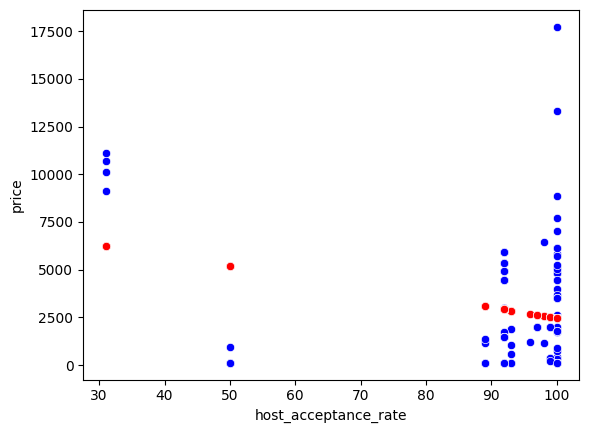

In [35]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="red", data=df)

In [36]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter = model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.06356033922932791

In [37]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.25211175940310265

**price vs host_is_superhost**

In [38]:
# Convertir los valores 'True' y 'False' a valores booleanos y luego a numéricos
df['host_is_superhost'] = df['host_is_superhost'].map({'t': True, 'f': False, 'Sin identificar': False}).astype(int)

<Axes: xlabel='host_is_superhost', ylabel='price'>

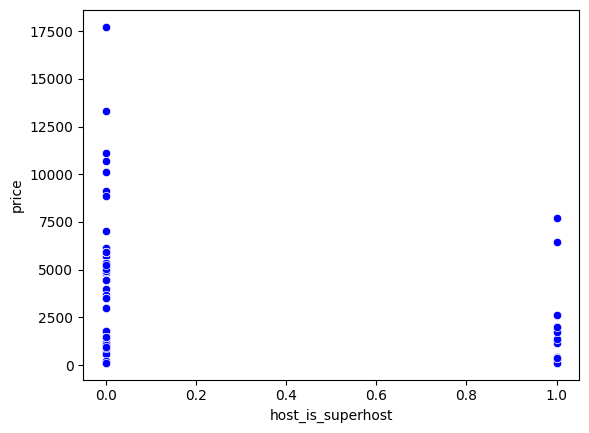

In [39]:
#Inprimimos el scatter plot entre la variable dependiente (total) e independiente (alcohol)
#para observar el comportamiento de su dispeción
from turtle import color 
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)

In [40]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep1 = df[['host_is_superhost']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep1 = df['price']

In [41]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [42]:
#Verificamos la finción relacionada al modelo
type (model1)

sklearn.linear_model._base.LinearRegression

In [43]:
#Ajustamos el modelo con las variables antes declaradas
model1.fit(X=Vars_Indep1, y=Vars_Dep1)

LinearRegression()

In [44]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-2585.00272232]),
 'rank_': 1,
 'singular_': array([5.1427619]),
 'intercept_': 3668.3448275862065}

In [45]:
model1.score(Vars_Indep1,Vars_Dep1)

0.14504251431744308

In [46]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred1 = model1.predict(X=df[['host_is_superhost']])
y_pred1

array([1083.34210526, 1083.34210526, 1083.34210526, 1083.34210526,
       1083.34210526, 1083.34210526, 1083.34210526, 1083.34210526,
       3668.34482759, 3668.34482759, 3668.34482759, 1083.34210526,
       3668.34482759, 3668.34482759, 1083.34210526, 3668.34482759,
       3668.34482759, 3668.34482759, 3668.34482759, 3668.34482759,
       1083.34210526, 1083.34210526, 1083.34210526, 1083.34210526,
       1083.34210526, 1083.34210526, 3668.34482759, 1083.34210526,
       1083.34210526, 1083.34210526, 1083.34210526, 1083.34210526,
       1083.34210526, 1083.34210526, 1083.34210526, 1083.34210526,
       1083.34210526, 1083.34210526, 1083.34210526, 1083.34210526,
       1083.34210526, 3668.34482759, 1083.34210526, 1083.34210526,
       3668.34482759, 1083.34210526, 3668.34482759, 3668.34482759,
       3668.34482759, 1083.34210526, 3668.34482759, 3668.34482759,
       3668.34482759, 3668.34482759, 1083.34210526, 3668.34482759,
       3668.34482759, 3668.34482759, 3668.34482759, 3668.34482

In [47]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones1', y_pred1)
df

Predicciones1  Predicciones  \
0      1083.342105   2858.412169   
1      1083.342105   2913.166330   
2      1083.342105   2913.166330   
3      1083.342105   2858.412169   
4      1083.342105   3077.428812   
..             ...           ...   
120    3668.344828   2913.166330   
121    3668.344828   2913.166330   
122    3668.344828   2913.166330   
123    3668.344828   2913.166330   
124    3668.344828   2913.166330   

                                          listing_url  host_since  \
0                 https://www.airbnb.com/rooms/281134  2010-08-09   
1                https://www.airbnb.com/rooms/1565220  2012-06-01   
2                https://www.airbnb.com/rooms/1736063  2012-06-01   
3                 https://www.airbnb.com/rooms/571166  2010-08-09   
4                 https://www.airbnb.com/rooms/737328  2012-10-12   
..                                                ...         ...   
120  https://www.airbnb.com/rooms/1191430079828817253  2023-11-20   
121  https://www.airbnb.com/rooms/1191430130484570539  2023-11-20   
122  https://www.airbnb.com/rooms/1191430238014754309  2023-11-20   
123  https://www.airbnb.com/rooms/1191430521084135024  2023-11-20   
124  https://www.airbnb.com/rooms/1191431981766770022  2023-11-20   

    host_response_time host_response_rate  host_acceptance_rate  \
0       within an hour               100%                  93.0   
1       within an hour               100%                  92.0   
2       within an hour               100%                  92.0   
3       within an hour               100%                  93.0   
4       within an hour               100%                  89.0   
..                 ...                ...                   ...   
120     within an hour               100%                  92.0   
121     within an hour               100%                  92.0   
122     within an hour               100%                  92.0   
123     within an hour               100%                  92.0   
124     within an hour               100%                  92.0   

     host_is_superhost                host_verifications  \
0                    1  ['email', 'phone', 'work_email']   
1                    1  ['email', 'phone', 'work_email']   
2                    1  ['email', 'phone', 'work_email']   
3                    1  ['email', 'phone', 'work_email']   
4                    1                ['email', 'phone']   
..                 ...                               ...   
120                  0                         ['phone']   
121                  0                         ['phone']   
122                  0                         ['phone']   
123                  0                         ['phone']   
124                  0                         ['phone']   

    neighbourhood_cleansed  ... review_scores_cleanliness  \
0               Cuauhtémoc  ...                      5.00   
1           Álvaro Obregón  ...                      5.00   
2           Álvaro Obregón  ...                      4.97   
3               Cuauhtémoc  ...                      5.00   
4               Cuauhtémoc  ...                      4.84   
..                     ...  ...                       ...   
120             Cuauhtémoc  ...                      4.84   
121             Cuauhtémoc  ...                      4.84   
122             Cuauhtémoc  ...                      4.84   
123             Cuauhtémoc  ...                      4.84   
124             Cuauhtémoc  ...                      4.84   

    review_scores_checkin review_scores_communication review_scores_location  \
0                    5.00                        5.00                   5.00   
1                    5.00                        4.96                   4.93   
2                    4.89                        4.93                   4.96   
3                    5.00                        4.90                   5.00   
4                    5.00                        5.00                   4.84   
..  

<Axes: xlabel='host_is_superhost', ylabel='price'>

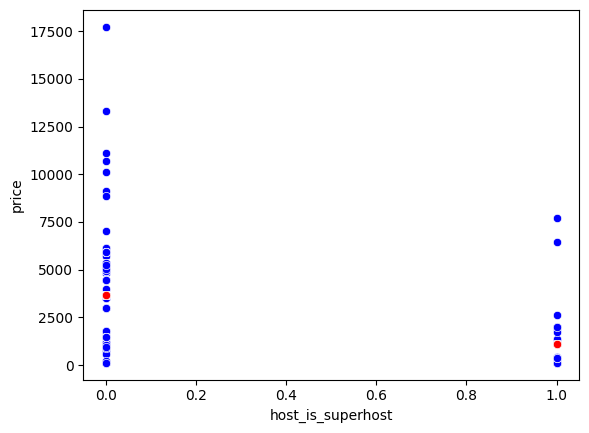

In [48]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='Predicciones1', color="red", data=df)

In [49]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1 = model1.score(X=Vars_Indep1, y=Vars_Dep1)
coef_Deter1

0.14504251431744308

In [50]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl1 = np.sqrt(coef_Deter1)
coef_Correl1

0.38084447523555215

**accommodates vs bathrooms**

<Axes: xlabel='bathrooms', ylabel='accommodates'>

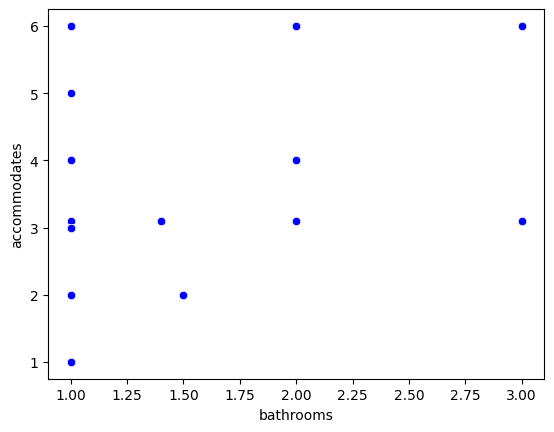

In [51]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)

In [52]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep2 = df[['bathrooms']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep2 = df['accommodates']

In [53]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

In [54]:
#Veerficamos la finción relacionada al modelo
type (model2)

sklearn.linear_model._base.LinearRegression

In [55]:
#Ajustamos el modelo con las variables antes declaradas
model2.fit(X=Vars_Indep2, y=Vars_Dep2)

LinearRegression()

In [56]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.25718039]),
 'rank_': 1,
 'singular_': array([6.55662108]),
 'intercept_': 1.345048253890274}

In [57]:
model2.score(Vars_Indep2,Vars_Dep2)

0.3143530307780559

In [58]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred2 = model2.predict(X=df[['bathrooms']])
y_pred2

array([2.60222865, 2.60222865, 2.60222865, 2.60222865, 2.60222865,
       2.60222865, 2.60222865, 2.60222865, 2.60222865, 3.10510081,
       2.60222865, 3.85940904, 3.10510081, 3.10510081, 2.60222865,
       2.60222865, 2.60222865, 3.10510081, 2.60222865, 2.60222865,
       2.60222865, 2.60222865, 2.60222865, 2.60222865, 2.60222865,
       2.60222865, 2.60222865, 2.60222865, 2.60222865, 2.60222865,
       2.60222865, 2.60222865, 2.60222865, 2.60222865, 2.60222865,
       2.60222865, 2.60222865, 2.60222865, 2.60222865, 2.60222865,
       2.60222865, 2.60222865, 2.60222865, 2.60222865, 2.60222865,
       2.60222865, 2.60222865, 2.60222865, 2.60222865, 3.23081885,
       2.60222865, 2.60222865, 2.60222865, 2.60222865, 2.60222865,
       2.60222865, 2.60222865, 2.60222865, 2.60222865, 3.23081885,
       2.60222865, 2.60222865, 2.60222865, 2.60222865, 2.60222865,
       2.60222865, 2.60222865, 2.60222865, 2.60222865, 2.60222865,
       2.60222865, 2.60222865, 2.60222865, 2.60222865, 2.60222

In [59]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones2', y_pred2)
df

Predicciones2  Predicciones1  Predicciones  \
0         2.602229    1083.342105   2858.412169   
1         2.602229    1083.342105   2913.166330   
2         2.602229    1083.342105   2913.166330   
3         2.602229    1083.342105   2858.412169   
4         2.602229    1083.342105   3077.428812   
..             ...            ...           ...   
120       3.105101    3668.344828   2913.166330   
121       3.105101    3668.344828   2913.166330   
122       3.105101    3668.344828   2913.166330   
123       2.602229    3668.344828   2913.166330   
124       2.602229    3668.344828   2913.166330   

                                          listing_url  host_since  \
0                 https://www.airbnb.com/rooms/281134  2010-08-09   
1                https://www.airbnb.com/rooms/1565220  2012-06-01   
2                https://www.airbnb.com/rooms/1736063  2012-06-01   
3                 https://www.airbnb.com/rooms/571166  2010-08-09   
4                 https://www.airbnb.com/rooms/737328  2012-10-12   
..                                                ...         ...   
120  https://www.airbnb.com/rooms/1191430079828817253  2023-11-20   
121  https://www.airbnb.com/rooms/1191430130484570539  2023-11-20   
122  https://www.airbnb.com/rooms/1191430238014754309  2023-11-20   
123  https://www.airbnb.com/rooms/1191430521084135024  2023-11-20   
124  https://www.airbnb.com/rooms/1191431981766770022  2023-11-20   

    host_response_time host_response_rate  host_acceptance_rate  \
0       within an hour               100%                  93.0   
1       within an hour               100%                  92.0   
2       within an hour               100%                  92.0   
3       within an hour               100%                  93.0   
4       within an hour               100%                  89.0   
..                 ...                ...                   ...   
120     within an hour               100%                  92.0   
121     within an hour               100%                  92.0   
122     within an hour               100%                  92.0   
123     within an hour               100%                  92.0   
124     within an hour               100%                  92.0   

     host_is_superhost                host_verifications  ...  \
0                    1  ['email', 'phone', 'work_email']  ...   
1                    1  ['email', 'phone', 'work_email']  ...   
2                    1  ['email', 'phone', 'work_email']  ...   
3                    1  ['email', 'phone', 'work_email']  ...   
4                    1                ['email', 'phone']  ...   
..                 ...                               ...  ...   
120                  0                         ['phone']  ...   
121                  0                         ['phone']  ...   
122                  0                         ['phone']  ...   
123                  0                         ['phone']  ...   
124                  0                         ['phone']  ...   

    review_scores_cleanliness review_scores_checkin  \
0                        5.00                  5.00   
1                        5.00                  5.00   
2                        4.97                  4.89   
3                        5.00                  5.00   
4                        4.84                  5.00   
..                        ...                   ...   
120                      4.84                  4.80   
121                      4.84                  4.80   
122                      4.84                  4.80   
123                      4.84                  4.80   
124                      4.84                  4.80   

    review_scores_communication review_scores_location review_scores_value  \
0                          5.00                   5.00                4.86   
1                          4.96                   4.93                4.93   
2                          4.93                   4.96                4.86   
3   

<Axes: xlabel='bathrooms', ylabel='accommodates'>

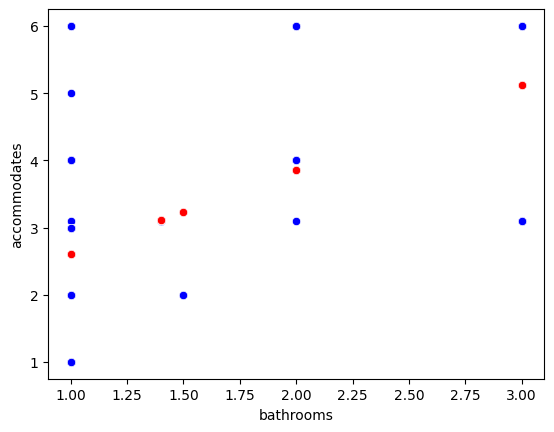

In [60]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)
sns.scatterplot(x='bathrooms', y='Predicciones2', color="red", data=df)

In [61]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2 = model2.score(X=Vars_Indep2, y=Vars_Dep2)
coef_Deter2

0.3143530307780559

In [62]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl2 = np.sqrt(coef_Deter2)
coef_Correl2

0.560671945774047

**price vs review_scores_cleanliness**

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

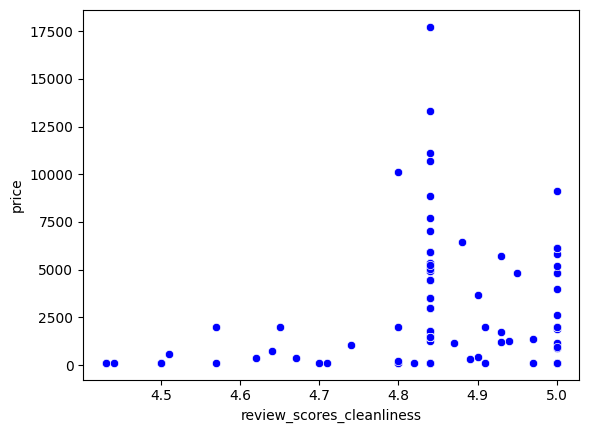

In [63]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)

In [64]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep3 = df[['review_scores_cleanliness']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep3 = df['price']

In [65]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()

In [66]:
#Veerficamos la finción relacionada al modelo
type (model3)

sklearn.linear_model._base.LinearRegression

In [67]:
#Ajustamos el modelo con las variables antes declaradas
model3.fit(X=Vars_Indep3, y=Vars_Dep3)

LinearRegression()

In [68]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1780.05129572]),
 'rank_': 1,
 'singular_': array([1.44303735]),
 'intercept_': -5761.709900243769}

In [69]:
model3.score(Vars_Indep3,Vars_Dep3)

0.00541502734879129

In [70]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred3 = model3.predict(X=df[['review_scores_cleanliness']])
y_pred3

array([3138.54657838, 3138.54657838, 3085.14503951, 3138.54657838,
       2853.73837106, 3031.74350063, 2907.13990993, 3085.14503951,
       3138.54657838, 2782.53631923, 3013.94298768, 2924.94042289,
       2853.73837106, 3138.54657838, 2960.5414488 , 2497.72811192,
       2622.33170262, 2853.73837106, 2978.34196176, 3138.54657838,
       2782.53631923, 2978.34196176, 3138.54657838, 2373.12452122,
       2515.52862487, 2818.13734515, 2782.53631923, 3013.94298768,
       2942.74093585, 2248.52093051, 2248.52093051, 3138.54657838,
       3138.54657838, 3138.54657838, 2123.91733981, 2141.71785277,
       2373.12452122, 2123.91733981, 2782.53631923, 2782.53631923,
       2604.53118966, 2266.32144347, 3138.54657838, 3138.54657838,
       3138.54657838, 2853.73837106, 3138.54657838, 3138.54657838,
       3138.54657838, 2853.73837106, 2675.73324149, 3138.54657838,
       2853.73837106, 3138.54657838, 3138.54657838, 3138.54657838,
       3138.54657838, 3049.54401359, 3013.94298768, 3138.54657

In [71]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones3', y_pred3)
df

Predicciones3  Predicciones2  Predicciones1  Predicciones  \
0      3138.546578       2.602229    1083.342105   2858.412169   
1      3138.546578       2.602229    1083.342105   2913.166330   
2      3085.145040       2.602229    1083.342105   2913.166330   
3      3138.546578       2.602229    1083.342105   2858.412169   
4      2853.738371       2.602229    1083.342105   3077.428812   
..             ...            ...            ...           ...   
120    2853.738371       3.105101    3668.344828   2913.166330   
121    2853.738371       3.105101    3668.344828   2913.166330   
122    2853.738371       3.105101    3668.344828   2913.166330   
123    2853.738371       2.602229    3668.344828   2913.166330   
124    2853.738371       2.602229    3668.344828   2913.166330   

                                          listing_url  host_since  \
0                 https://www.airbnb.com/rooms/281134  2010-08-09   
1                https://www.airbnb.com/rooms/1565220  2012-06-01   
2                https://www.airbnb.com/rooms/1736063  2012-06-01   
3                 https://www.airbnb.com/rooms/571166  2010-08-09   
4                 https://www.airbnb.com/rooms/737328  2012-10-12   
..                                                ...         ...   
120  https://www.airbnb.com/rooms/1191430079828817253  2023-11-20   
121  https://www.airbnb.com/rooms/1191430130484570539  2023-11-20   
122  https://www.airbnb.com/rooms/1191430238014754309  2023-11-20   
123  https://www.airbnb.com/rooms/1191430521084135024  2023-11-20   
124  https://www.airbnb.com/rooms/1191431981766770022  2023-11-20   

    host_response_time host_response_rate  host_acceptance_rate  \
0       within an hour               100%                  93.0   
1       within an hour               100%                  92.0   
2       within an hour               100%                  92.0   
3       within an hour               100%                  93.0   
4       within an hour               100%                  89.0   
..                 ...                ...                   ...   
120     within an hour               100%                  92.0   
121     within an hour               100%                  92.0   
122     within an hour               100%                  92.0   
123     within an hour               100%                  92.0   
124     within an hour               100%                  92.0   

     host_is_superhost  ... review_scores_cleanliness review_scores_checkin  \
0                    1  ...                      5.00                  5.00   
1                    1  ...                      5.00                  5.00   
2                    1  ...                      4.97                  4.89   
3                    1  ...                      5.00                  5.00   
4                    1  ...                      4.84                  5.00   
..                 ...  ...                       ...                   ...   
120                  0  ...                      4.84                  4.80   
121                  0  ...                      4.84                  4.80   
122                  0  ...                      4.84                  4.80   
123                  0  ...                      4.84                  4.80   
124                  0  ...                      4.84                  4.80   

    review_scores_communication review_scores_location review_scores_value  \
0                          5.00                   5.00                4.86   
1                          4.96                   4.93                4.93   
2                          4.93                   4.96                4.86   
3                          4.90                   5.00                4.80   
4                          5.00                   4.84                4.80   
..                          ...                    ...                 ...   
120                        4.80                   4.80                4.70   
121  

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

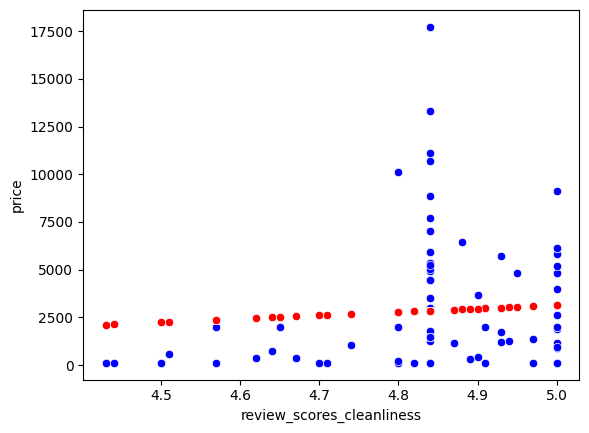

In [72]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones3', color="red", data=df)

In [73]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3 = model3.score(X=Vars_Indep3, y=Vars_Dep3)
coef_Deter3

0.00541502734879129

In [74]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl3 = np.sqrt(coef_Deter3)
coef_Correl3

0.073586869404747

**price vs instant_bookable**

In [75]:
# Convertir los valores 'True' y 'False' a valores booleanos y luego a numéricos
df['instant_bookable'] = df['instant_bookable'].map({'t': True, 'f': False}).astype(int)

<Axes: xlabel='instant_bookable', ylabel='price'>

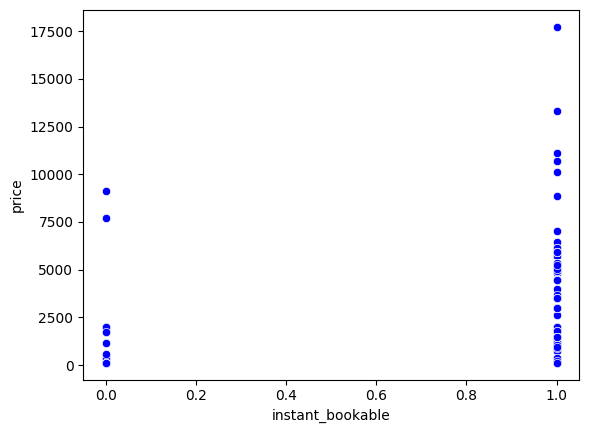

In [76]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)

In [77]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep5 = df[['instant_bookable']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep5 = df['price']

In [78]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model5 = LinearRegression()

In [79]:
#Veerficamos la finción relacionada al modelo
type (model5)

sklearn.linear_model._base.LinearRegression

In [80]:
#Ajustamos el modelo con las variables antes declaradas
model5.fit(X=Vars_Indep5, y=Vars_Dep5)

LinearRegression()

In [81]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1823.02813299]),
 'rank_': 1,
 'singular_': array([4.33220498]),
 'intercept_': 1394.913043478262}

In [82]:
model5.score(Vars_Indep5,Vars_Dep5)

0.05119000949509178

In [83]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred5 = model5.predict(X=df[['instant_bookable']])
y_pred5

array([3217.94117647, 1394.91304348, 1394.91304348, 3217.94117647,
       3217.94117647, 3217.94117647, 3217.94117647, 3217.94117647,
       1394.91304348, 3217.94117647, 3217.94117647, 3217.94117647,
       3217.94117647, 1394.91304348, 1394.91304348, 3217.94117647,
       3217.94117647, 3217.94117647, 3217.94117647, 3217.94117647,
       3217.94117647, 1394.91304348, 1394.91304348, 3217.94117647,
       1394.91304348, 1394.91304348, 3217.94117647, 1394.91304348,
       1394.91304348, 3217.94117647, 3217.94117647, 3217.94117647,
       3217.94117647, 3217.94117647, 3217.94117647, 3217.94117647,
       3217.94117647, 3217.94117647, 3217.94117647, 3217.94117647,
       3217.94117647, 1394.91304348, 3217.94117647, 1394.91304348,
       3217.94117647, 1394.91304348, 3217.94117647, 3217.94117647,
       1394.91304348, 1394.91304348, 3217.94117647, 1394.91304348,
       1394.91304348, 3217.94117647, 3217.94117647, 1394.91304348,
       3217.94117647, 3217.94117647, 3217.94117647, 3217.94117

In [84]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones5', y_pred5)
df

Predicciones5  Predicciones3  Predicciones2  Predicciones1  Predicciones  \
0      3217.941176    3138.546578       2.602229    1083.342105   2858.412169   
1      1394.913043    3138.546578       2.602229    1083.342105   2913.166330   
2      1394.913043    3085.145040       2.602229    1083.342105   2913.166330   
3      3217.941176    3138.546578       2.602229    1083.342105   2858.412169   
4      3217.941176    2853.738371       2.602229    1083.342105   3077.428812   
..             ...            ...            ...            ...           ...   
120    3217.941176    2853.738371       3.105101    3668.344828   2913.166330   
121    3217.941176    2853.738371       3.105101    3668.344828   2913.166330   
122    3217.941176    2853.738371       3.105101    3668.344828   2913.166330   
123    3217.941176    2853.738371       2.602229    3668.344828   2913.166330   
124    3217.941176    2853.738371       2.602229    3668.344828   2913.166330   

                                          listing_url  host_since  \
0                 https://www.airbnb.com/rooms/281134  2010-08-09   
1                https://www.airbnb.com/rooms/1565220  2012-06-01   
2                https://www.airbnb.com/rooms/1736063  2012-06-01   
3                 https://www.airbnb.com/rooms/571166  2010-08-09   
4                 https://www.airbnb.com/rooms/737328  2012-10-12   
..                                                ...         ...   
120  https://www.airbnb.com/rooms/1191430079828817253  2023-11-20   
121  https://www.airbnb.com/rooms/1191430130484570539  2023-11-20   
122  https://www.airbnb.com/rooms/1191430238014754309  2023-11-20   
123  https://www.airbnb.com/rooms/1191430521084135024  2023-11-20   
124  https://www.airbnb.com/rooms/1191431981766770022  2023-11-20   

    host_response_time host_response_rate  host_acceptance_rate  ...  \
0       within an hour               100%                  93.0  ...   
1       within an hour               100%                  92.0  ...   
2       within an hour               100%                  92.0  ...   
3       within an hour               100%                  93.0  ...   
4       within an hour               100%                  89.0  ...   
..                 ...                ...                   ...  ...   
120     within an hour               100%                  92.0  ...   
121     within an hour               100%                  92.0  ...   
122     within an hour               100%                  92.0  ...   
123     within an hour               100%                  92.0  ...   
124     within an hour               100%                  92.0  ...   

     review_scores_cleanliness review_scores_checkin  \
0                         5.00                  5.00   
1                         5.00                  5.00   
2                         4.97                  4.89   
3                         5.00                  5.00   
4                         4.84                  5.00   
..                         ...                   ...   
120                       4.84                  4.80   
121                       4.84                  4.80   
122                       4.84                  4.80   
123                       4.84                  4.80   
124                       4.84                  4.80   

    review_scores_communication review_scores_location review_scores_value  \
0                          5.00                   5.00                4.86   
1                          4.96                   4.93                4.93   
2                          4.93                   4.96                4.86   
3                          4.90                   5.00                4.80   
4                          5.00                   4.84                4.80   
..                          ...                    ...                 ...   
120                        4.80                   4.80                4.70   
121                        4.80          

<Axes: xlabel='instant_bookable', ylabel='price'>

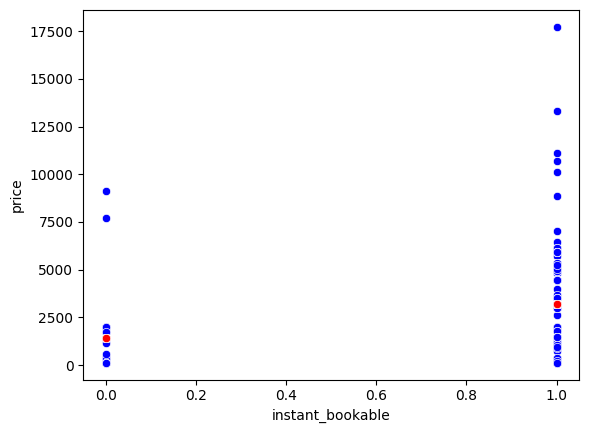

In [85]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)
sns.scatterplot(x='instant_bookable', y='Predicciones5', color="red", data=df)

In [86]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5 = model5.score(X=Vars_Indep5, y=Vars_Dep5)
coef_Deter5

0.05119000949509178

In [87]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl5 = np.sqrt(coef_Deter5)
coef_Correl5

0.22625209279715355

**price vs property_type**

In [88]:
tipos_habitacion = df['property_type'].unique()
tipos_habitacion

array(['Room in serviced apartment', 'Room in boutique hotel',
       'Room in bed and breakfast', 'Room in aparthotel', 'Room in hotel',
       'Room in casa particular', 'Room in hostel'], dtype=object)

In [89]:
# Crear un diccionario de mapeo basado en los tipos de habitación proporcionados
tipo_a_numero = {
    'Room in serviced apartment': 1,
    'Room in boutique hotel': 2,
    'Room in bed and breakfast': 3,
    'Room in aparthotel': 4,
    'Room in hotel': 5,
    'Room in casa particular': 6,
    'Room in hostel': 7
}

# Aplicar el mapeo a la columna 'property_type'
df['property_type_numerico'] = df['property_type'].map(tipo_a_numero)

<Axes: xlabel='property_type_numerico', ylabel='price'>

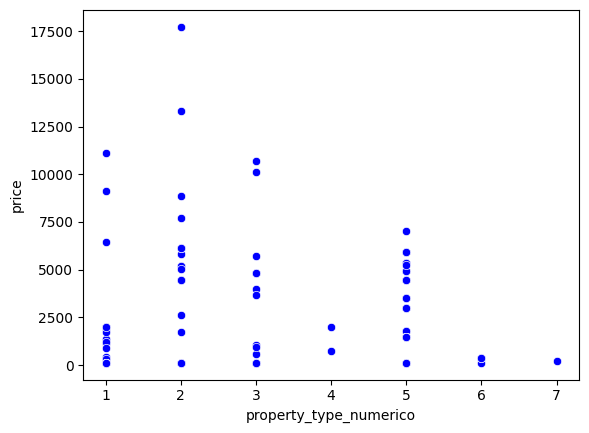

In [90]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='property_type_numerico', y='price', color="blue", data=df)

In [91]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep6 = df[['property_type_numerico']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep6 = df['price']

In [92]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model6 = LinearRegression()

In [93]:
#Veerficamos la finción relacionada al modelo
type (model6)

sklearn.linear_model._base.LinearRegression

In [94]:
#Ajustamos el modelo con las variables antes declaradas
model6.fit(X=Vars_Indep6, y=Vars_Dep6)

LinearRegression()

In [95]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type_numerico'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([69.00938819]),
 'rank_': 1,
 'singular_': array([19.47305831]),
 'intercept_': 2656.1532067510548}

In [96]:
model6.score(Vars_Indep6,Vars_Dep6)

0.0014820578523920824

In [97]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred6 = model6.predict(X=df[['property_type_numerico']])
y_pred6

array([2725.16259494, 2794.17198312, 2794.17198312, 2725.16259494,
       2725.16259494, 2725.16259494, 2725.16259494, 2725.16259494,
       2725.16259494, 2863.18137131, 2725.16259494, 2725.16259494,
       2863.18137131, 2725.16259494, 2725.16259494, 2932.19075949,
       2794.17198312, 2725.16259494, 2725.16259494, 2725.16259494,
       2932.19075949, 2725.16259494, 2725.16259494, 2725.16259494,
       2725.16259494, 2725.16259494, 2794.17198312, 2725.16259494,
       2725.16259494, 3001.20014768, 3001.20014768, 3001.20014768,
       3001.20014768, 3001.20014768, 3001.20014768, 3001.20014768,
       3001.20014768, 3001.20014768, 3001.20014768, 3001.20014768,
       3001.20014768, 2863.18137131, 2794.17198312, 2725.16259494,
       2794.17198312, 2725.16259494, 2725.16259494, 2725.16259494,
       2725.16259494, 2794.17198312, 2863.18137131, 2794.17198312,
       3070.20953586, 2863.18137131, 2725.16259494, 2725.16259494,
       2863.18137131, 2863.18137131, 2863.18137131, 2863.18137

In [98]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones6', y_pred6)
df

Predicciones6  Predicciones5  Predicciones3  Predicciones2  \
0      2725.162595    3217.941176    3138.546578       2.602229   
1      2794.171983    1394.913043    3138.546578       2.602229   
2      2794.171983    1394.913043    3085.145040       2.602229   
3      2725.162595    3217.941176    3138.546578       2.602229   
4      2725.162595    3217.941176    2853.738371       2.602229   
..             ...            ...            ...            ...   
120    3001.200148    3217.941176    2853.738371       3.105101   
121    3001.200148    3217.941176    2853.738371       3.105101   
122    3001.200148    3217.941176    2853.738371       3.105101   
123    3001.200148    3217.941176    2853.738371       2.602229   
124    3001.200148    3217.941176    2853.738371       2.602229   

     Predicciones1  Predicciones  \
0      1083.342105   2858.412169   
1      1083.342105   2913.166330   
2      1083.342105   2913.166330   
3      1083.342105   2858.412169   
4      1083.342105   3077.428812   
..             ...           ...   
120    3668.344828   2913.166330   
121    3668.344828   2913.166330   
122    3668.344828   2913.166330   
123    3668.344828   2913.166330   
124    3668.344828   2913.166330   

                                          listing_url  host_since  \
0                 https://www.airbnb.com/rooms/281134  2010-08-09   
1                https://www.airbnb.com/rooms/1565220  2012-06-01   
2                https://www.airbnb.com/rooms/1736063  2012-06-01   
3                 https://www.airbnb.com/rooms/571166  2010-08-09   
4                 https://www.airbnb.com/rooms/737328  2012-10-12   
..                                                ...         ...   
120  https://www.airbnb.com/rooms/1191430079828817253  2023-11-20   
121  https://www.airbnb.com/rooms/1191430130484570539  2023-11-20   
122  https://www.airbnb.com/rooms/1191430238014754309  2023-11-20   
123  https://www.airbnb.com/rooms/1191430521084135024  2023-11-20   
124  https://www.airbnb.com/rooms/1191431981766770022  2023-11-20   

    host_response_time host_response_rate  ...  review_scores_checkin  \
0       within an hour               100%  ...                   5.00   
1       within an hour               100%  ...                   5.00   
2       within an hour               100%  ...                   4.89   
3       within an hour               100%  ...                   5.00   
4       within an hour               100%  ...                   5.00   
..                 ...                ...  ...                    ...   
120     within an hour               100%  ...                   4.80   
121     within an hour               100%  ...                   4.80   
122     within an hour               100%  ...                   4.80   
123     within an hour               100%  ...                   4.80   
124     within an hour               100%  ...                   4.80   

     review_scores_communication review_scores_location review_scores_value  \
0                           5.00                   5.00                4.86   
1                           4.96                   4.93                4.93   
2                           4.93                   4.96                4.86   
3                           4.90                   5.00                4.80   
4                           5.00                   4.84                4.80   
..                           ...                    ...                 ...   
120                         4.80                   4.80                4.70   
121                         4.80                   4.80                4.70   
122                         4.80                   4.80                4.70   
123                         4.80                   4.80                4.70   
124                         4.80                   4.80                4.70   

    calculated_host_listings_count  \
0                              8.0   
1                              7.0  

<Axes: xlabel='property_type_numerico', ylabel='price'>

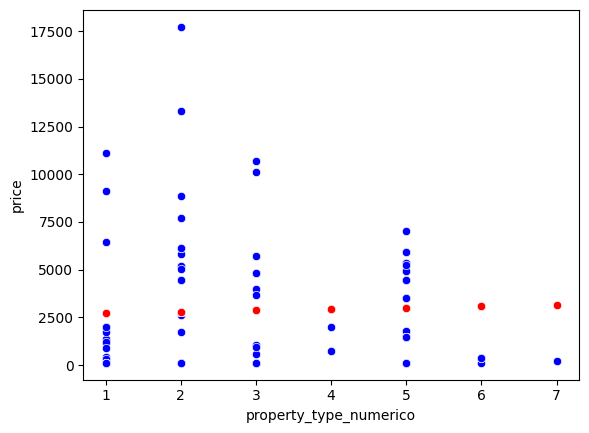

In [99]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='property_type_numerico', y='price', color="blue", data=df)
sns.scatterplot(x='property_type_numerico', y='Predicciones6', color="red", data=df)

In [100]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6 = model6.score(X=Vars_Indep6, y=Vars_Dep6)
coef_Deter6

0.0014820578523920824

In [101]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl6 = np.sqrt(coef_Deter6)
coef_Correl6

0.03849750449564338

**Mapa de calor**

In [102]:
# Utilizar el método select_dtypes para seleccionar solo columnas numéricas
df_numerico = df.select_dtypes(include=['number'])
df_numerico

Predicciones6  Predicciones5  Predicciones3  Predicciones2  \
0      2725.162595    3217.941176    3138.546578       2.602229   
1      2794.171983    1394.913043    3138.546578       2.602229   
2      2794.171983    1394.913043    3085.145040       2.602229   
3      2725.162595    3217.941176    3138.546578       2.602229   
4      2725.162595    3217.941176    2853.738371       2.602229   
..             ...            ...            ...            ...   
120    3001.200148    3217.941176    2853.738371       3.105101   
121    3001.200148    3217.941176    2853.738371       3.105101   
122    3001.200148    3217.941176    2853.738371       3.105101   
123    3001.200148    3217.941176    2853.738371       2.602229   
124    3001.200148    3217.941176    2853.738371       2.602229   

     Predicciones1  Predicciones  host_acceptance_rate  host_is_superhost  \
0      1083.342105   2858.412169                  93.0                  1   
1      1083.342105   2913.166330                  92.0                  1   
2      1083.342105   2913.166330                  92.0                  1   
3      1083.342105   2858.412169                  93.0                  1   
4      1083.342105   3077.428812                  89.0                  1   
..             ...           ...                   ...                ...   
120    3668.344828   2913.166330                  92.0                  0   
121    3668.344828   2913.166330                  92.0                  0   
122    3668.344828   2913.166330                  92.0                  0   
123    3668.344828   2913.166330                  92.0                  0   
124    3668.344828   2913.166330                  92.0                  0   

      price  instant_bookable  ...  review_scores_checkin  \
0     120.0                 1  ...                   5.00   
1     120.0                 0  ...                   5.00   
2     120.0                 0  ...                   4.89   
3    1872.0                 1  ...                   5.00   
4    1275.0                 1  ...                   5.00   
..      ...               ...  ...                    ...   
120  5951.0                 1  ...                   4.80   
121  5951.0                 1  ...                   4.80   
122  5951.0                 1  ...                   4.80   
123  1484.0                 1  ...                   4.80   
124  1484.0                 1  ...                   4.80   

     review_scores_communication  review_scores_location  review_scores_value  \
0                           5.00                    5.00                 4.86   
1                           4.96                    4.93                 4.93   
2                           4.93                    4.96                 4.86   
3                           4.90                    5.00                 4.80   
4                           5.00                    4.84                 4.80   
..                           ...                     ...                  ...   
120                         4.80                    4.80                 4.70   
121                         4.80                    4.80                 4.70   
122                         4.80                    4.80                 4.70   
123                         4.80                    4.80                 4.70   
124                         4.80                    4.80                 4.70   

     calculated_host_listings_count  \
0                               8.0   
1                               7.0   
2                               7.0   
3                               8.0   
4                              11.0   
..                              ...   
120                            22.0   
121                            22.0   
122                            22.0   
123                            22.0   
124                            22.0   

     calculated_host_listings_count_entire_homes  \
0                                            4.0

In [103]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors = df_numerico.corr()
Corr_Factors

Predicciones6  Predicciones5  \
Predicciones6                                      1.000000       0.455659   
Predicciones5                                      0.455659       1.000000   
Predicciones3                                     -0.438984      -0.199682   
Predicciones2                                      0.340828       0.213177   
Predicciones1                                      0.206101       0.224781   
Predicciones                                      -0.083200       0.024587   
host_acceptance_rate                               0.083200      -0.024587   
host_is_superhost                                 -0.206101      -0.224781   
price                                              0.038498       0.226252   
instant_bookable                                   0.455659       1.000000   
id                                                 0.559034       0.362128   
host_id                                            0.561858       0.236649   
host_listings_count                                0.442381       0.410131   
host_total_listings_count                          0.394371       0.333878   
latitude                                           0.405048       0.379108   
longitude                                          0.466908       0.357758   
accommodates                                       0.247359       0.226016   
bathrooms                                          0.340828       0.213177   
bedrooms                                           0.328319       0.318175   
beds                                               0.236169       0.063689   
minimum_nights                                    -0.358919      -0.399758   
maximum_nights                                    -0.315391      -0.250345   
minimum_nights_avg_ntm                            -0.418413      -0.360983   
maximum_nights_avg_ntm                            -0.372697      -0.362798   
availability_30                                    0.331580       0.275083   
availability_60                                    0.116956       0.098793   
availability_90                                    0.122730       0.081316   
availability_365                                  -0.225112      -0.152522   
number_of_reviews                                 -0.208479      -0.144474   
number_of_reviews_ltm                             -0.123249      -0.261750   
number_of_reviews_l30d                            -0.019042      -0.164963   
review_scores_rating                              -0.116577       0.077425   
review_scores_accuracy                            -0.226365      -0.009474   
review_scores_cleanliness                         -0.438984      -0.199682   
review_scores_checkin                             -0.380366      -0.006066   
review_scores_communication                       -0.450132      -0.175646   
review_scores_location                            -0.512504      -0.297035   
review_scores_value                               -0.359233      -0.120619   
calculated_host_listings_count                     0.429796       0.309221   
calculated_host_listings_count_entire_homes       -0.560775      -0.213349   
calculated_host_listings_count_private_rooms      -0.217284      -0.257048   
calculated_host_listings_count_shared_rooms       -0.032815      -0.008429   
reviews_per_month                                  0.395724       0.110650   
property_type_numerico                             1.000000       0.455659   

                                              Predicciones3  Predicciones2  \
Predicciones6                                     -0.438984       0.340828   
Predicciones5                                     -0.199682       0.213177   
Predicciones3                                      1.000000      -0.046806   
Predicciones2                                     -0.046806       1.000000   
Predicciones1                                      0.195936       0.296306   
Predicciones                                       0.085935       0

In [104]:
#Encontramos el valor absoluto de todas las correlaciones entre las  variables
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

Predicciones6  Predicciones5  \
Predicciones6                                      1.000000       0.455659   
Predicciones5                                      0.455659       1.000000   
Predicciones3                                      0.438984       0.199682   
Predicciones2                                      0.340828       0.213177   
Predicciones1                                      0.206101       0.224781   
Predicciones                                       0.083200       0.024587   
host_acceptance_rate                               0.083200       0.024587   
host_is_superhost                                  0.206101       0.224781   
price                                              0.038498       0.226252   
instant_bookable                                   0.455659       1.000000   
id                                                 0.559034       0.362128   
host_id                                            0.561858       0.236649   
host_listings_count                                0.442381       0.410131   
host_total_listings_count                          0.394371       0.333878   
latitude                                           0.405048       0.379108   
longitude                                          0.466908       0.357758   
accommodates                                       0.247359       0.226016   
bathrooms                                          0.340828       0.213177   
bedrooms                                           0.328319       0.318175   
beds                                               0.236169       0.063689   
minimum_nights                                     0.358919       0.399758   
maximum_nights                                     0.315391       0.250345   
minimum_nights_avg_ntm                             0.418413       0.360983   
maximum_nights_avg_ntm                             0.372697       0.362798   
availability_30                                    0.331580       0.275083   
availability_60                                    0.116956       0.098793   
availability_90                                    0.122730       0.081316   
availability_365                                   0.225112       0.152522   
number_of_reviews                                  0.208479       0.144474   
number_of_reviews_ltm                              0.123249       0.261750   
number_of_reviews_l30d                             0.019042       0.164963   
review_scores_rating                               0.116577       0.077425   
review_scores_accuracy                             0.226365       0.009474   
review_scores_cleanliness                          0.438984       0.199682   
review_scores_checkin                              0.380366       0.006066   
review_scores_communication                        0.450132       0.175646   
review_scores_location                             0.512504       0.297035   
review_scores_value                                0.359233       0.120619   
calculated_host_listings_count                     0.429796       0.309221   
calculated_host_listings_count_entire_homes        0.560775       0.213349   
calculated_host_listings_count_private_rooms       0.217284       0.257048   
calculated_host_listings_count_shared_rooms        0.032815       0.008429   
reviews_per_month                                  0.395724       0.110650   
property_type_numerico                             1.000000       0.455659   

                                              Predicciones3  Predicciones2  \
Predicciones6                                      0.438984       0.340828   
Predicciones5                                      0.199682       0.213177   
Predicciones3                                      1.000000       0.046806   
Predicciones2                                      0.046806       1.000000   
Predicciones1                                      0.195936       0.296306   
Predicciones                                       0.085935       0

<Axes: >

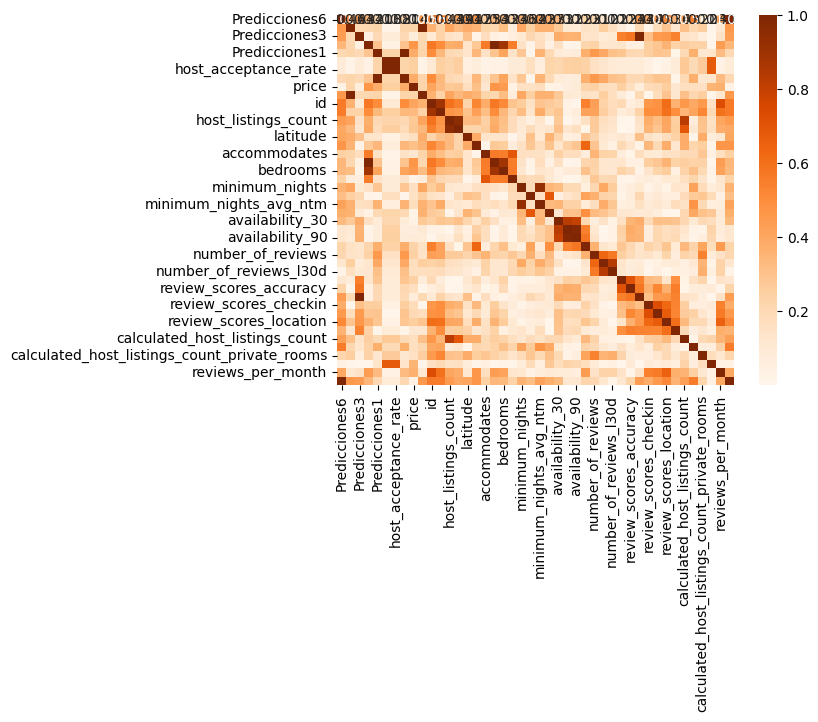

In [105]:
#
Heat_Map = sns.heatmap(Corr_Factors1, cmap='Oranges', annot=True, fmt=".2f")
Heat_Map

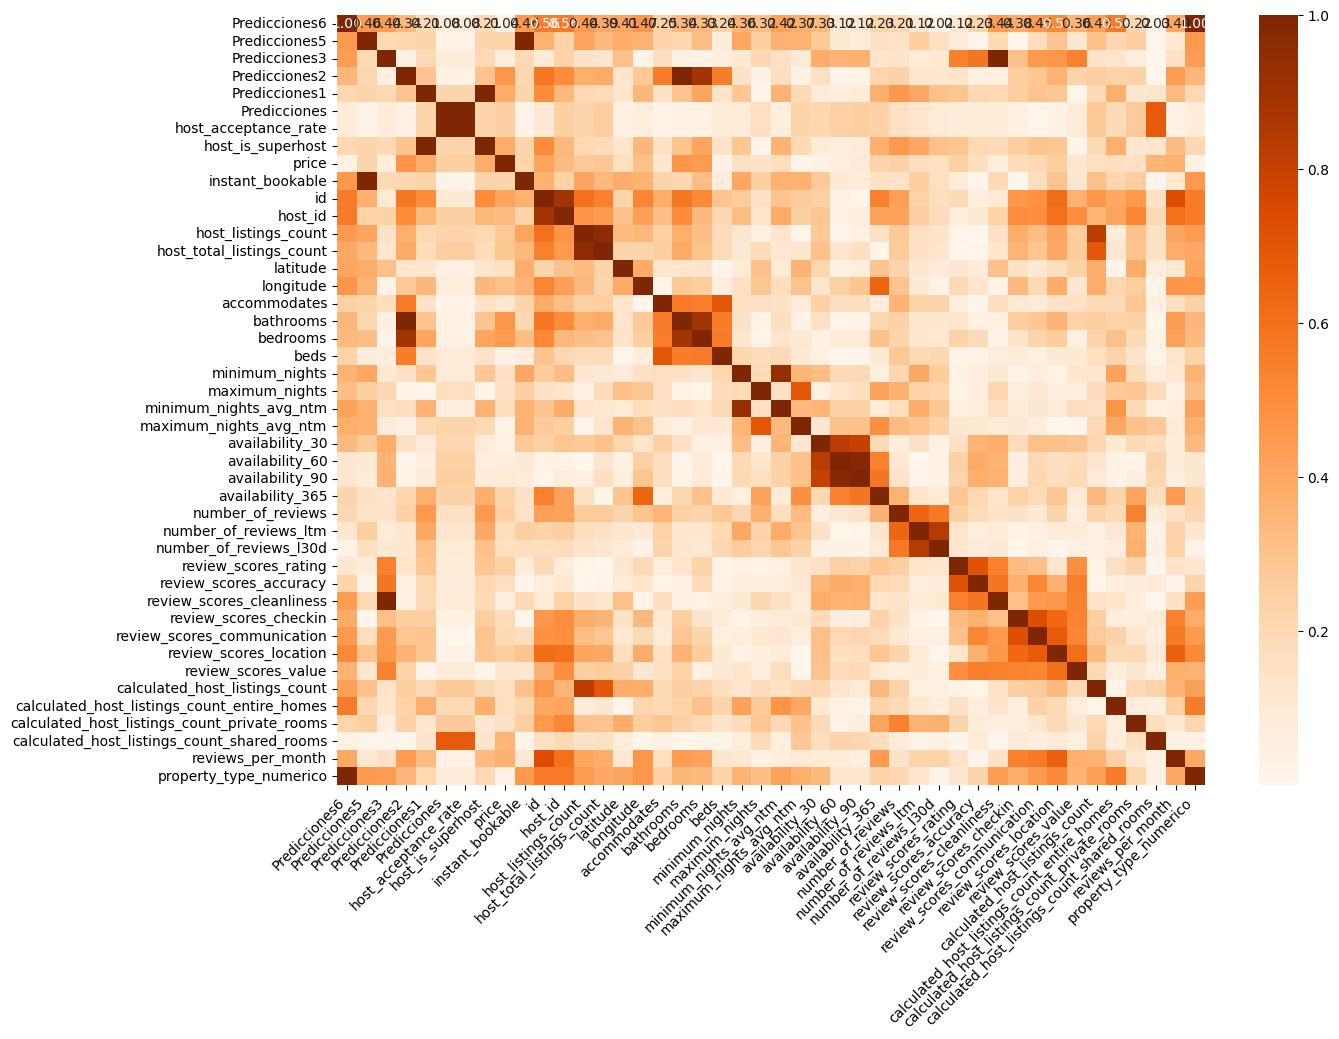

In [109]:
# # Crear la figura y el mapa de calor
plt.figure(figsize=(14, 10))  # Ajusta el tamaño de la figura según sea necesario
Heat_Map = sns.heatmap(Corr_Factors1, cmap='Oranges', annot=True, fmt=".2f", annot_kws={"size": 10})

# # Ajusta las etiquetas de los ejes si es necesario
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# # Mostrar el mapa de calor
plt.show()

# # Crear la figura y el mapa de calor
# plt.figure(figsize=(20, 15))  # Aumenta el tamaño de la figura
# Heat_Map = sns.heatmap(Corr_Factors1, cmap='Oranges', annot=True, fmt=".2f", annot_kws={"size": 10})

# # Ajusta las etiquetas de los ejes si es necesario
# plt.xticks(rotation=45, ha='right')
# plt.yticks(rotation=0)

# # Mostrar el mapa de calor
# plt.show()